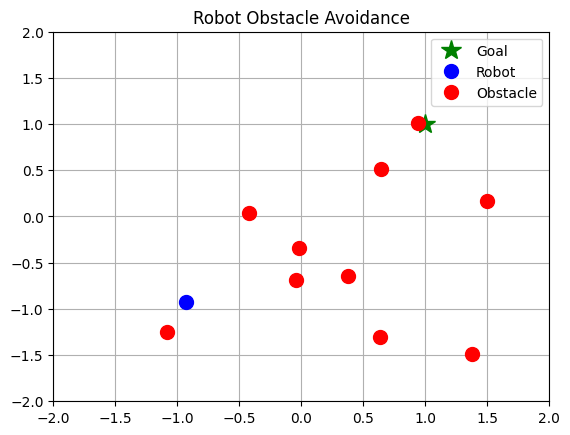

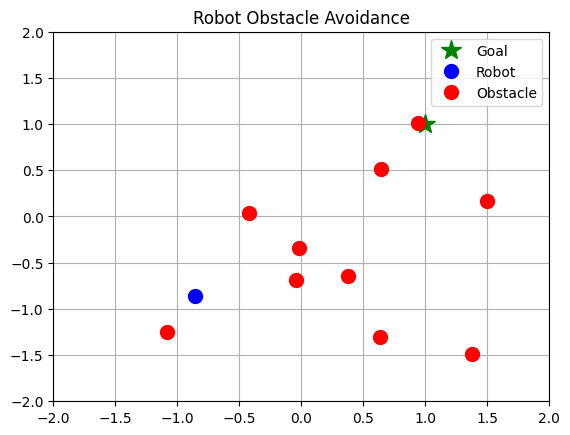

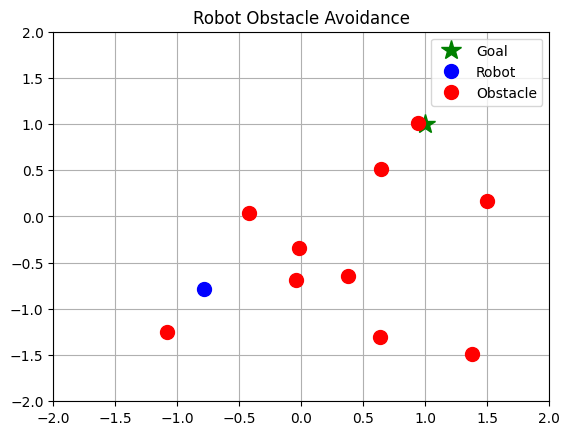

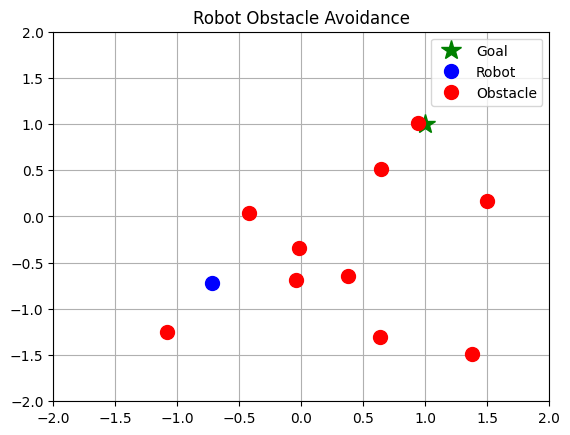

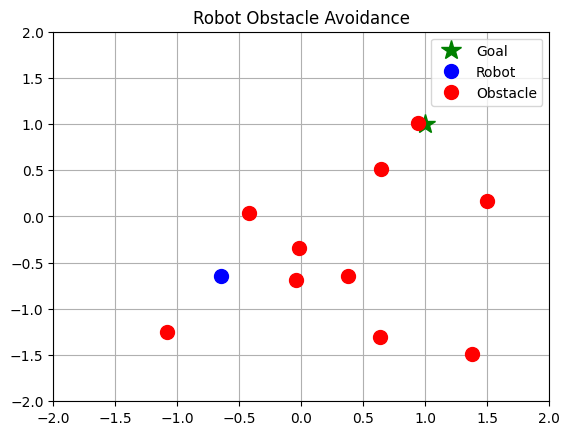

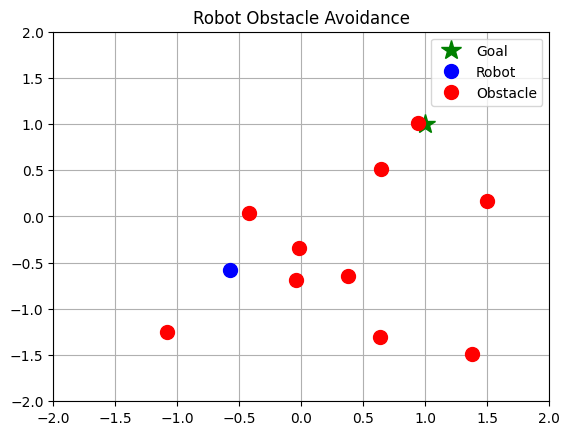

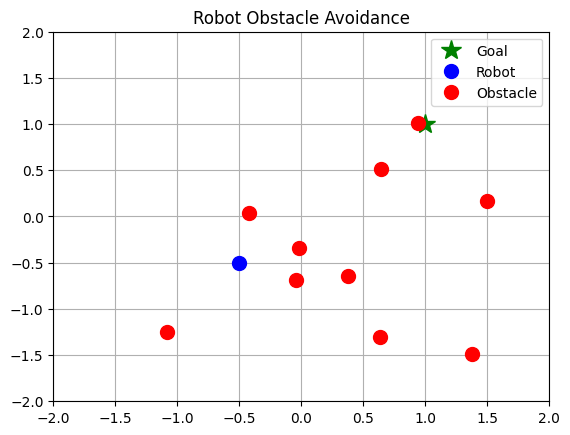

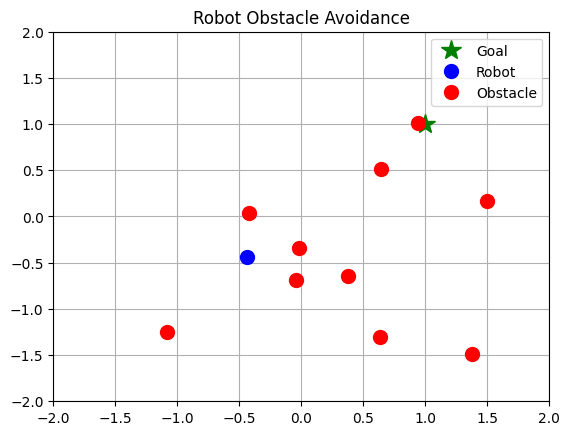

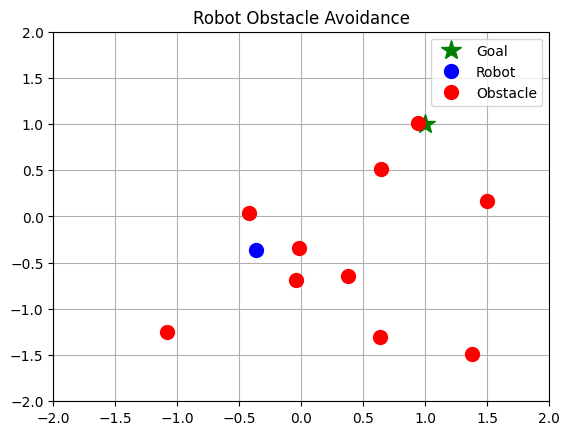

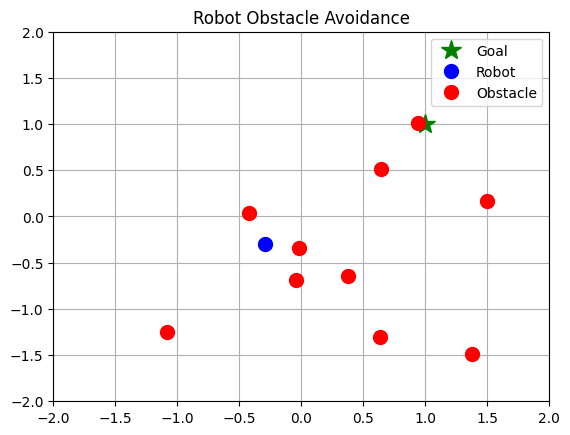

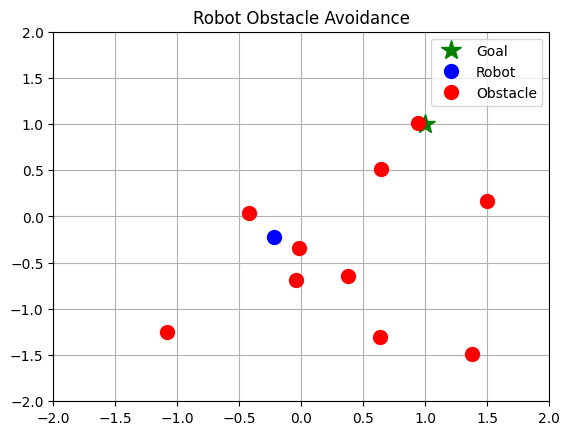

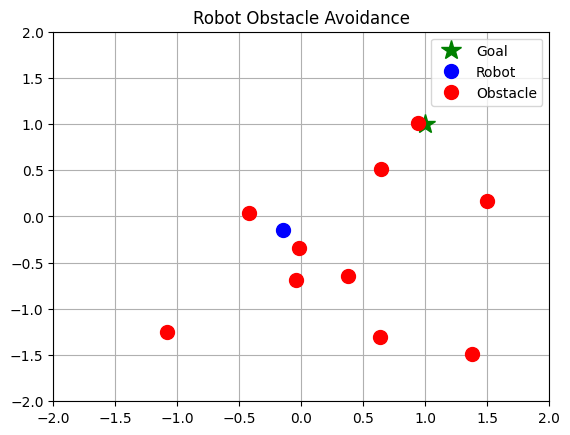

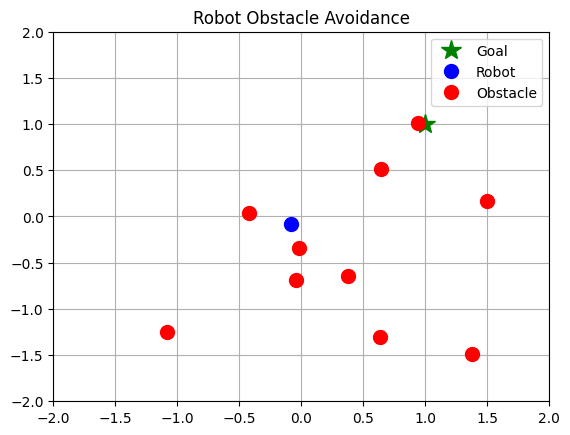

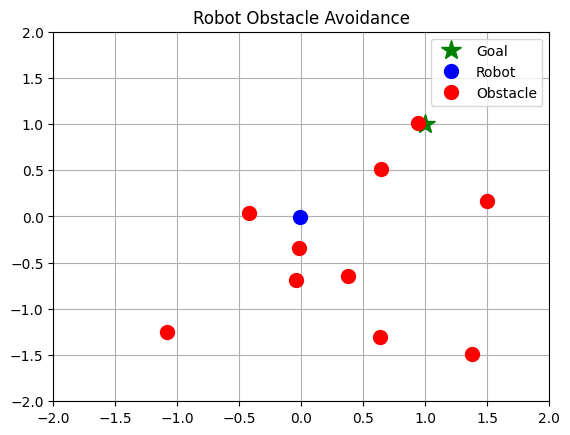

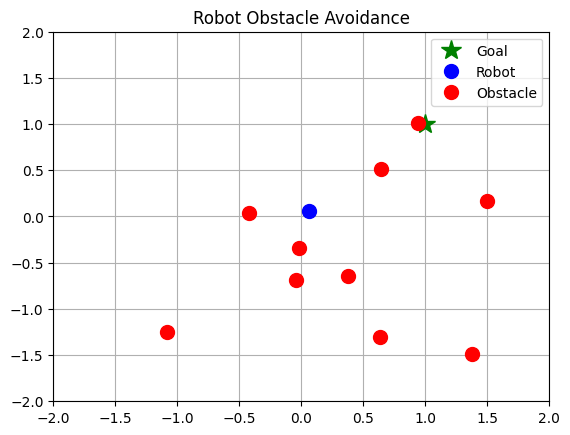

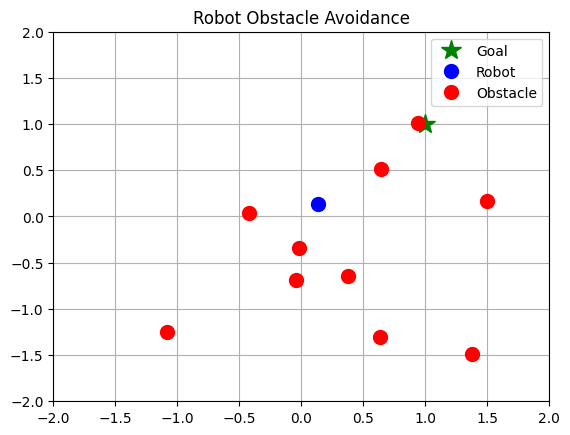

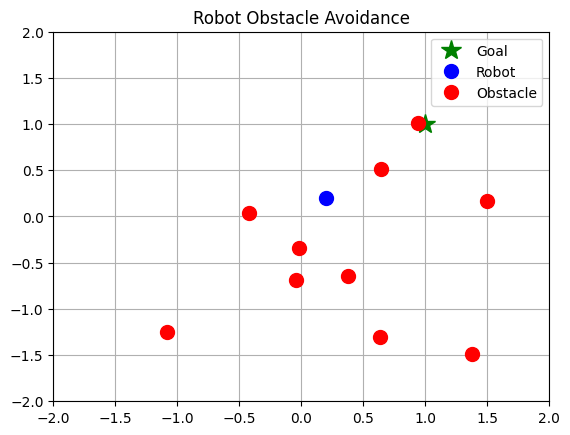

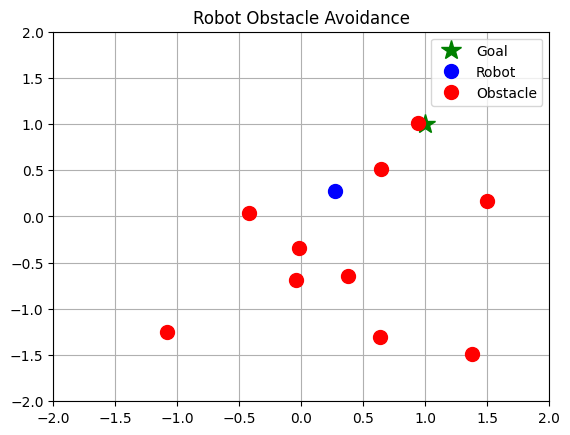

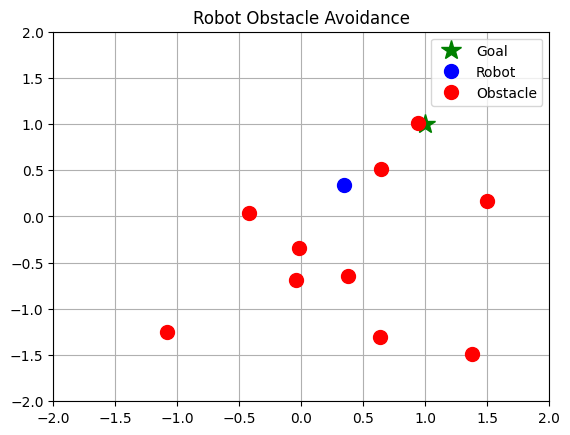

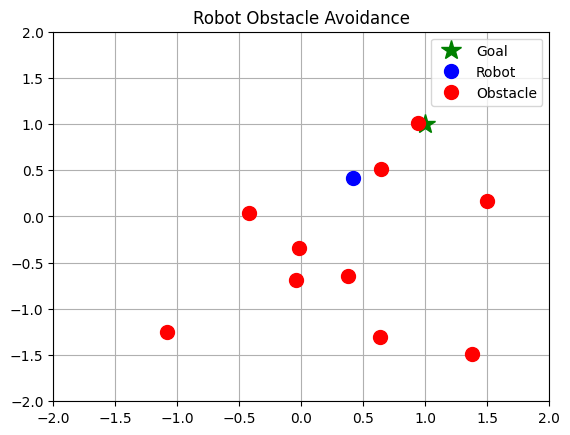

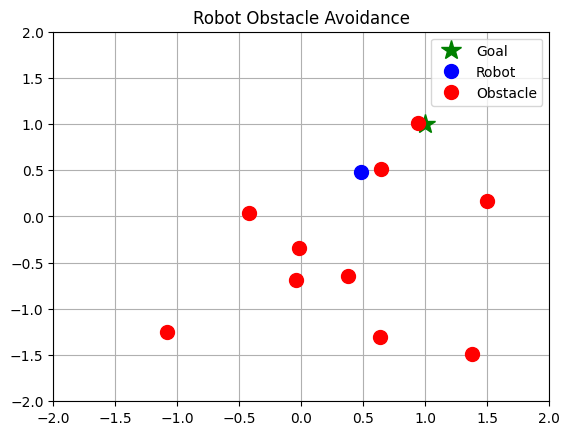

Obstacle Detected! Evading.


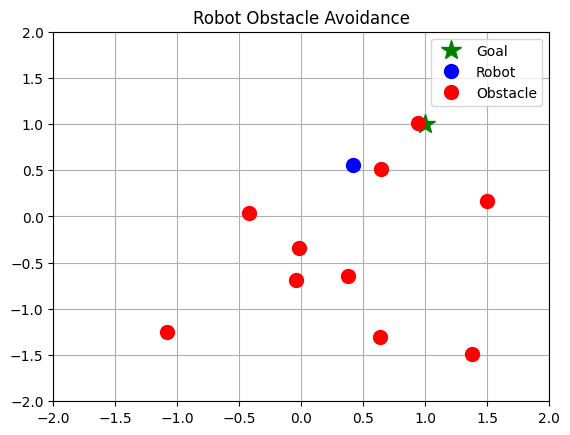

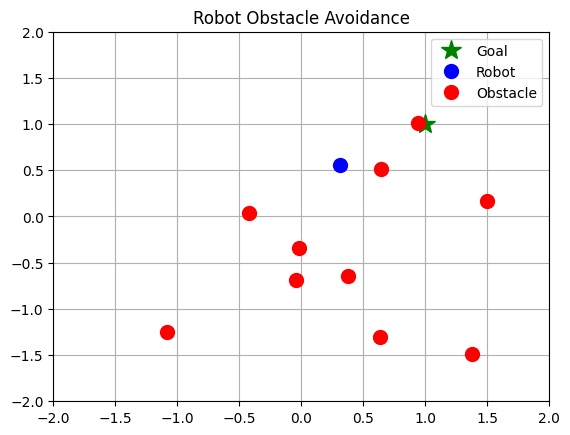

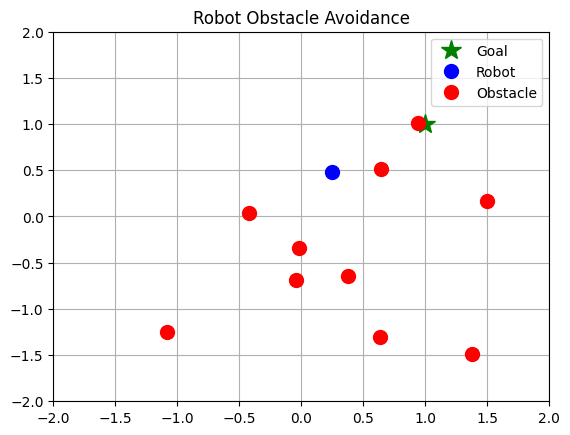

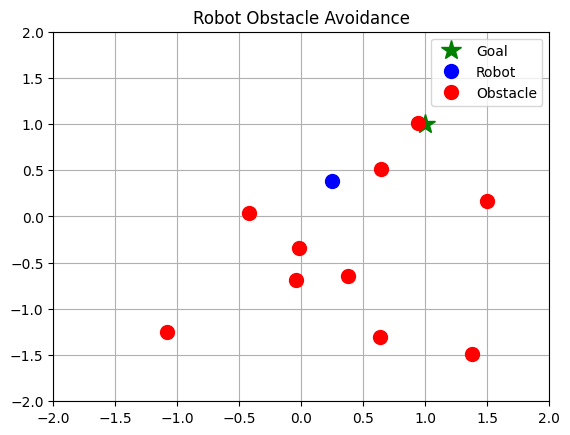

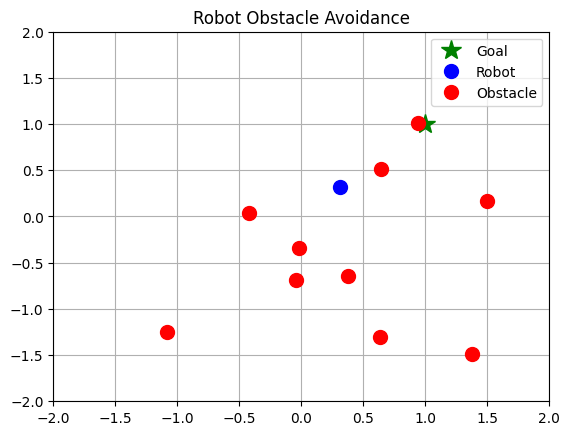

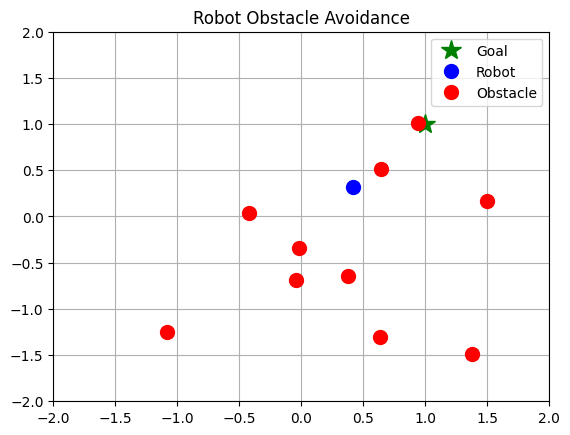

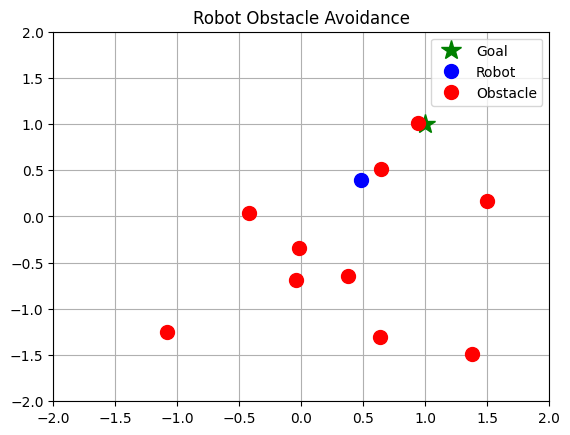

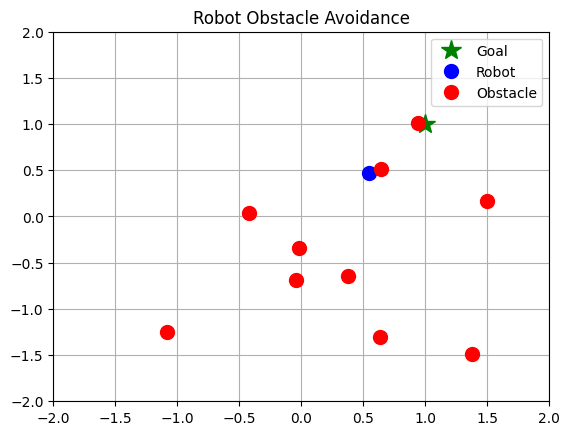

Obstacle Detected! Evading.


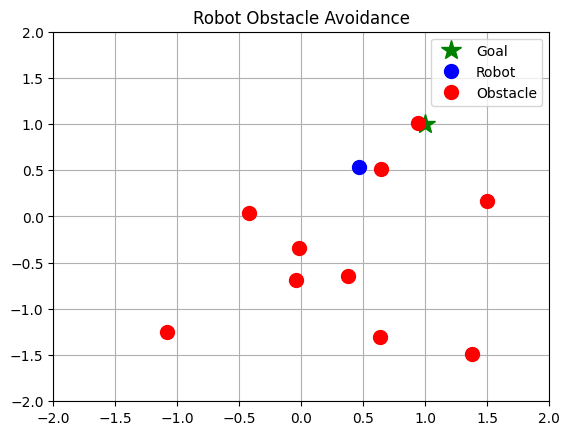

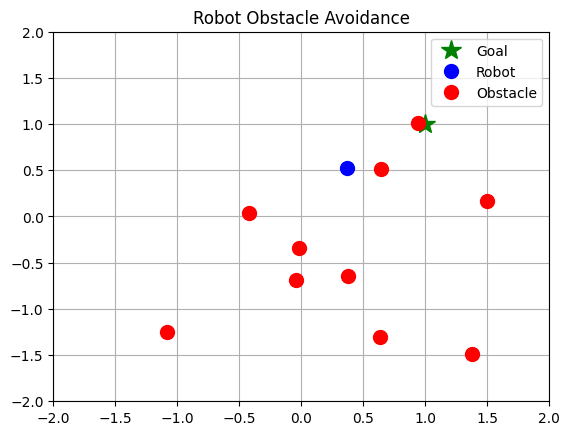

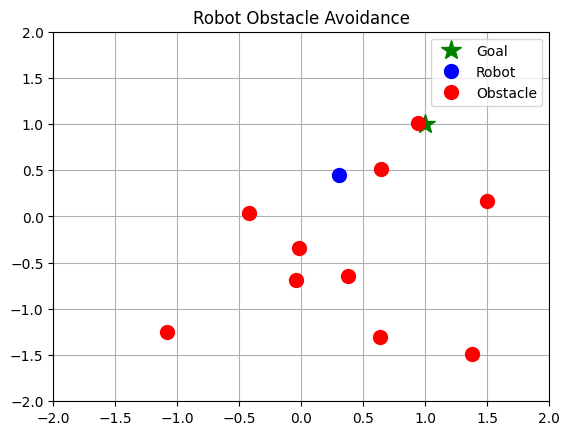

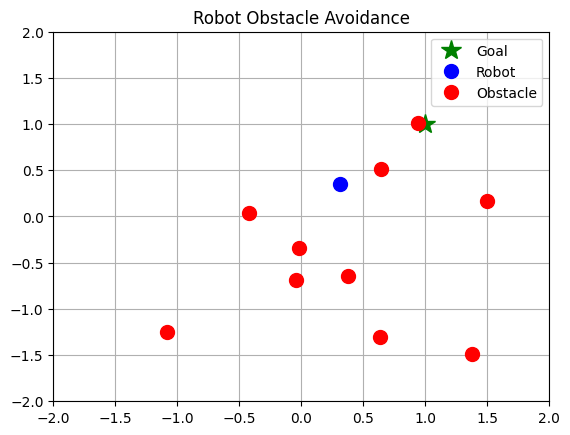

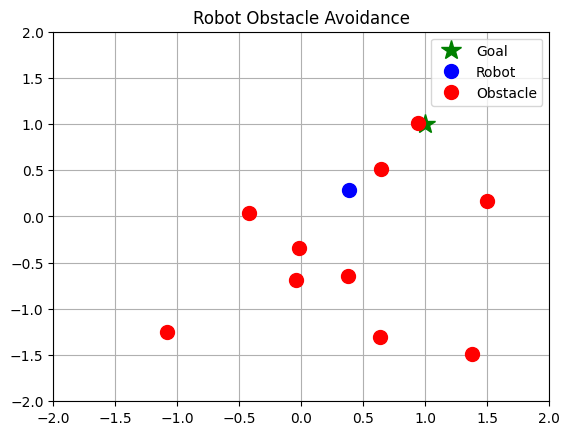

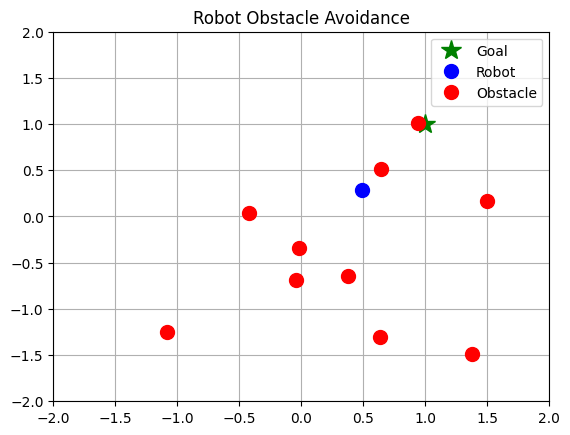

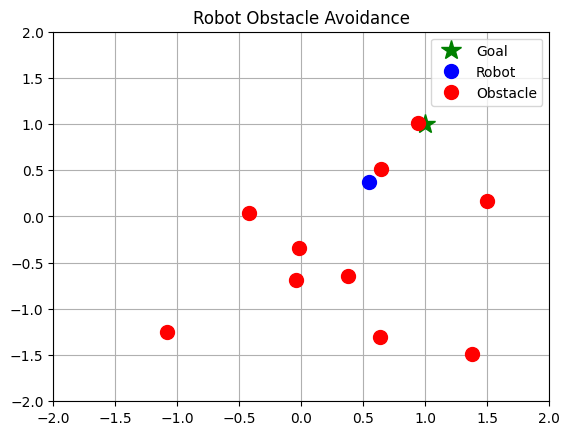

Obstacle Detected! Evading.


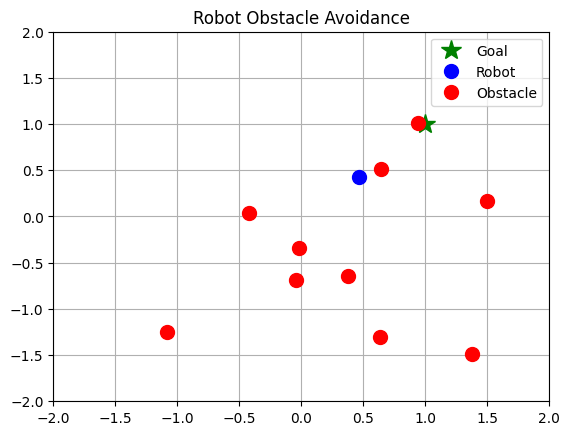

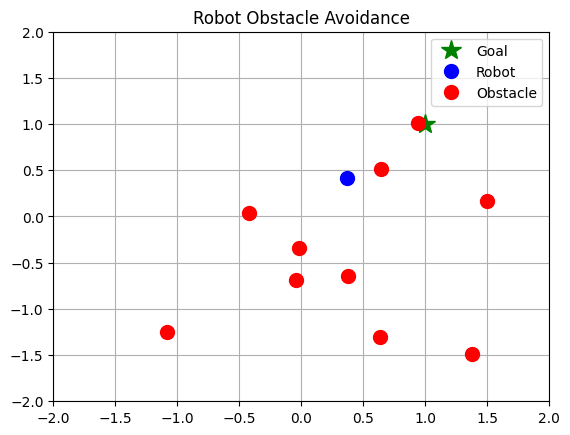

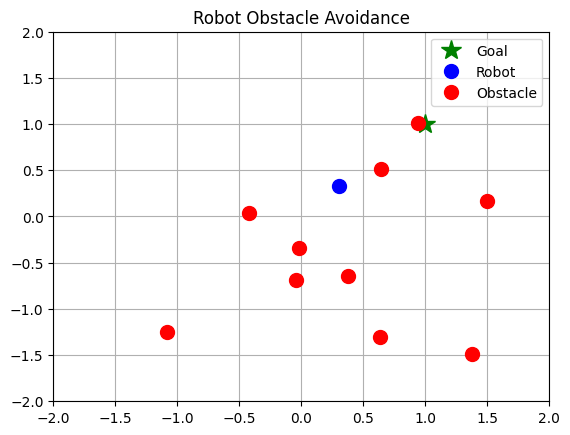

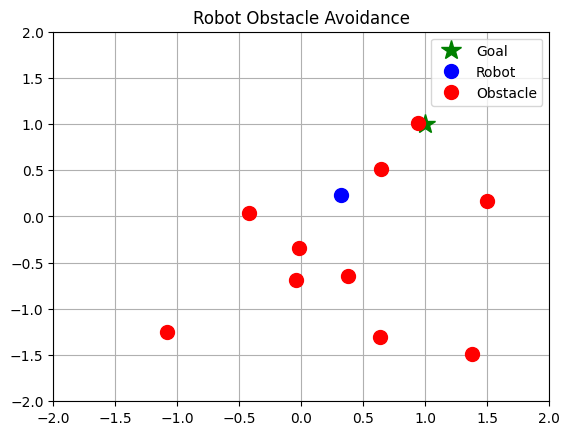

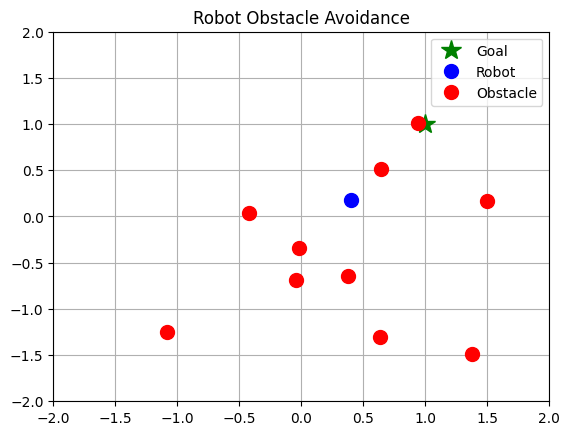

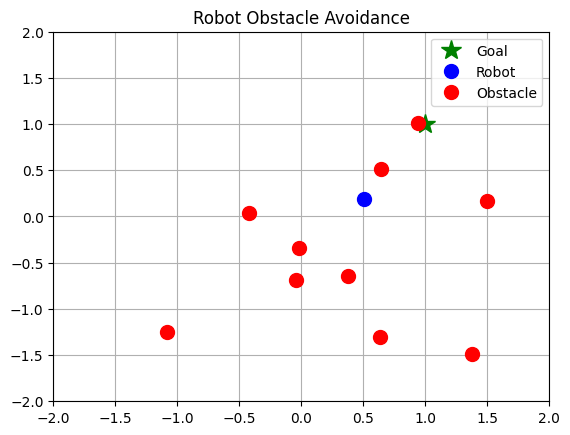

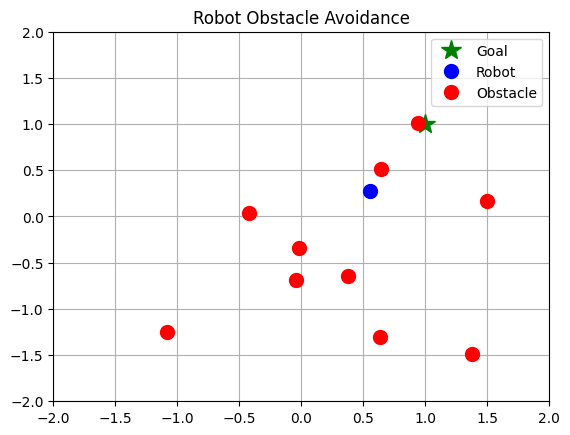

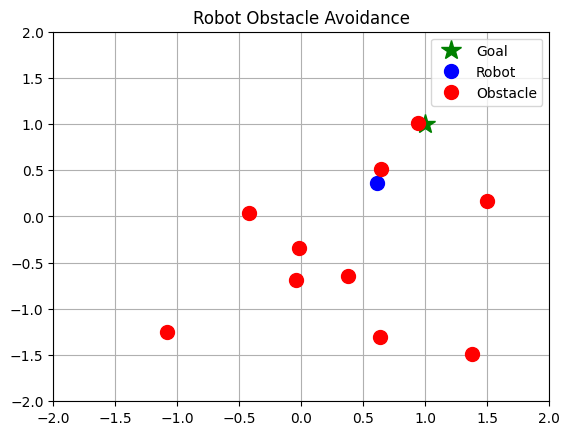

Obstacle Detected! Evading.


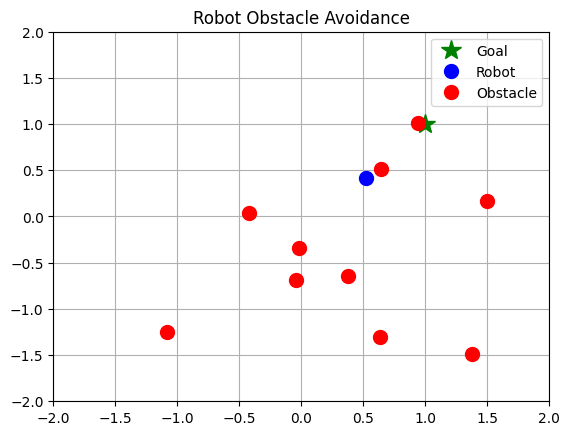

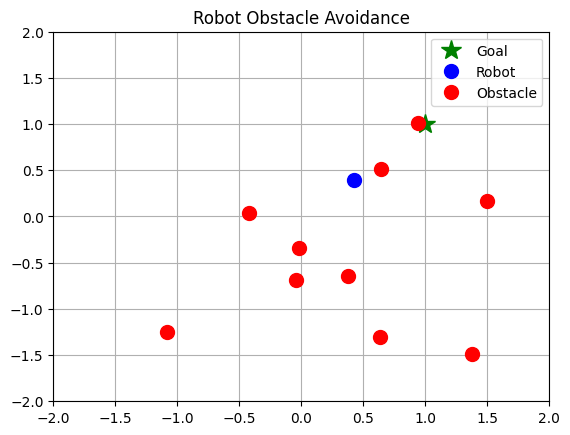

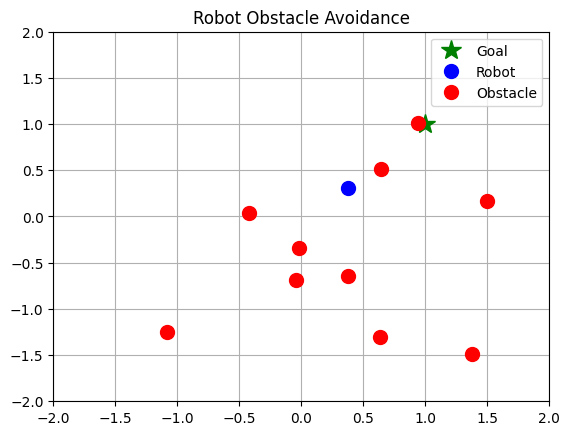

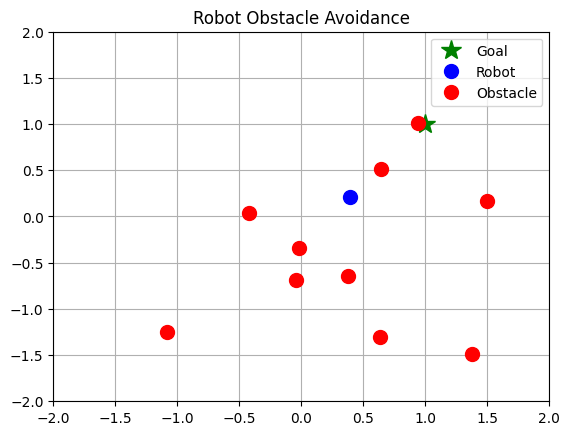

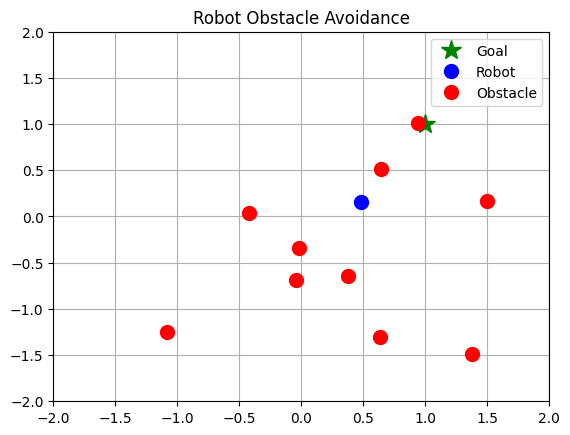

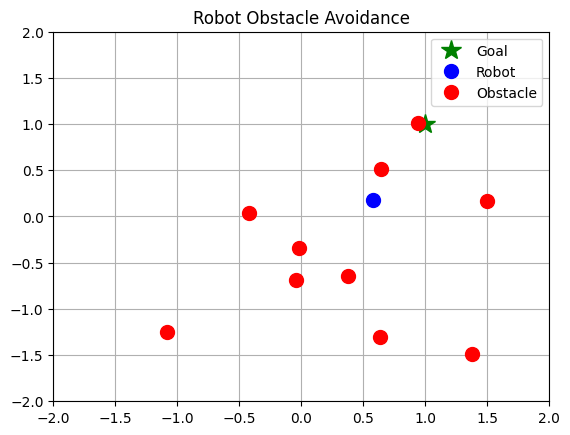

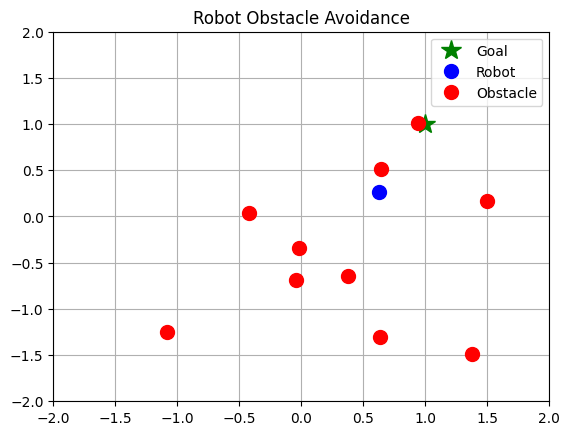

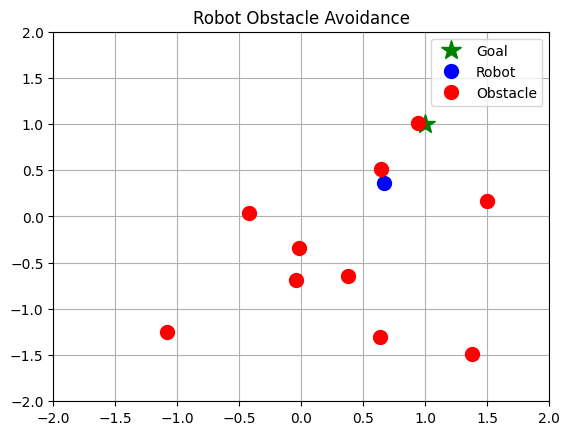

Obstacle Detected! Evading.


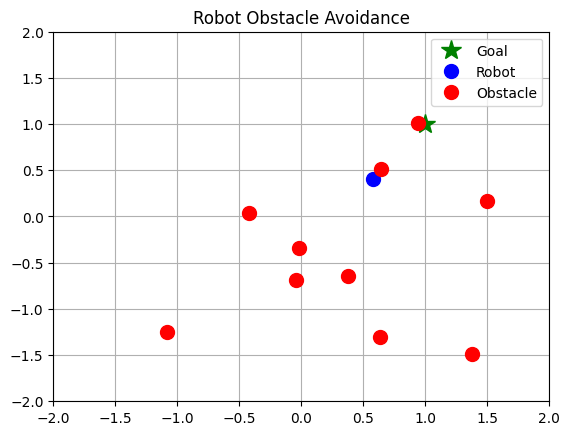

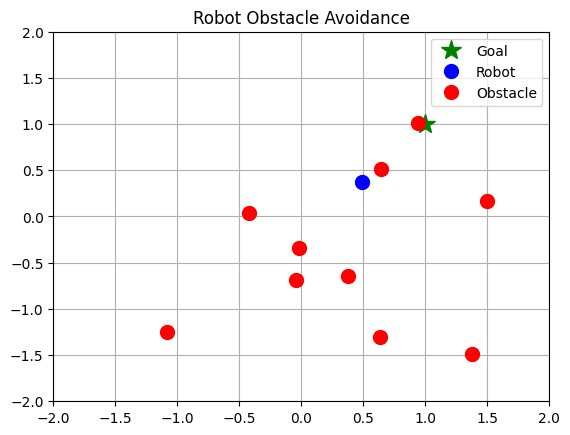

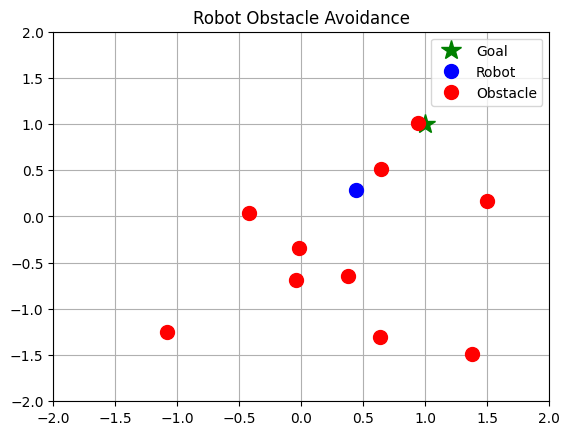

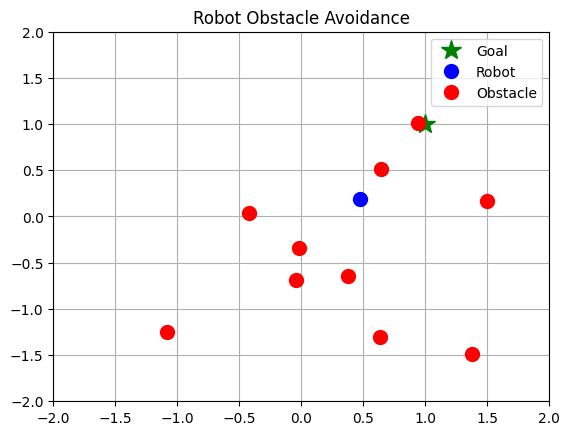

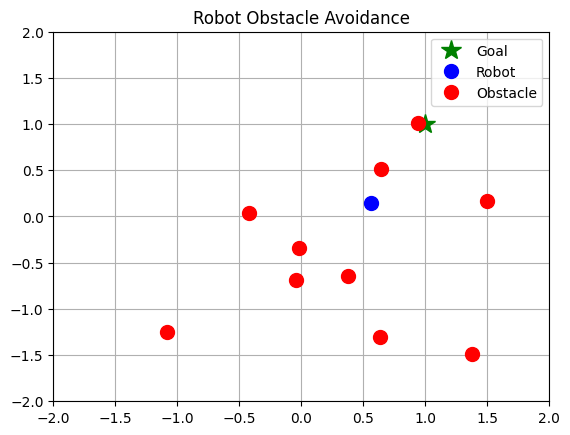

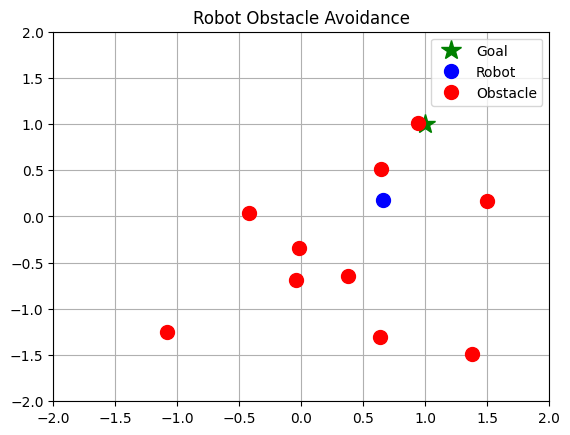

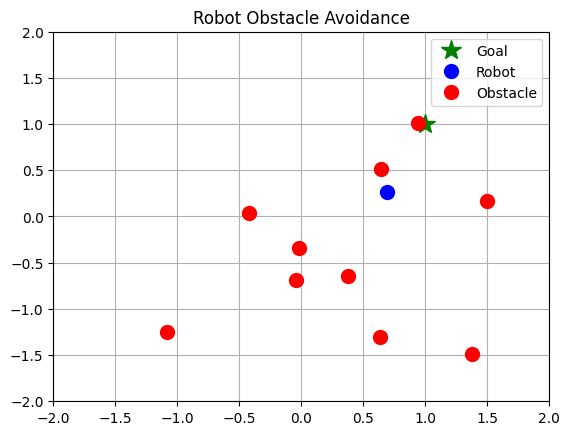

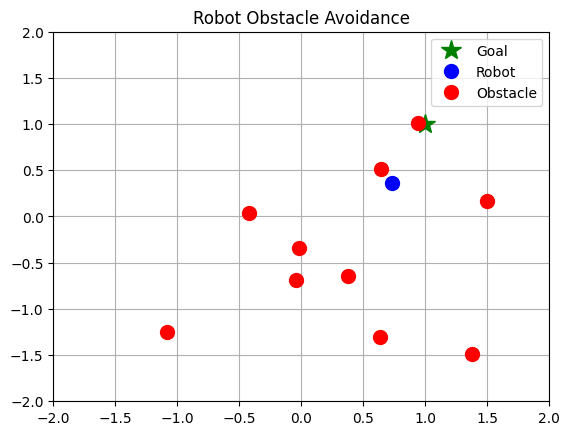

Obstacle Detected! Evading.


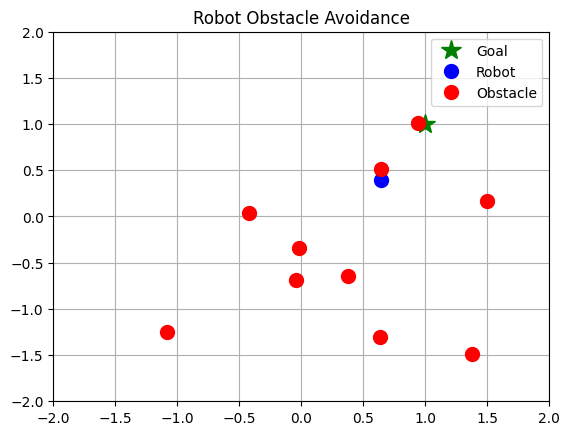

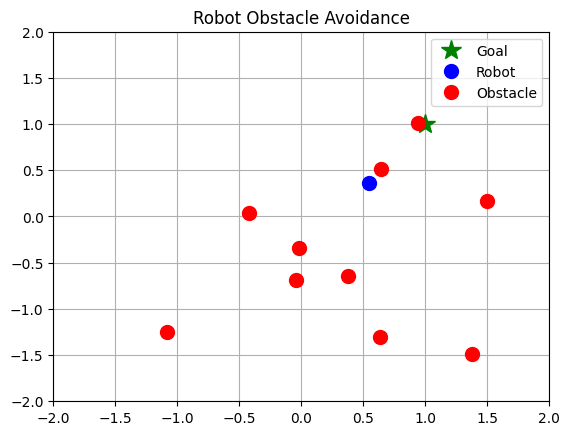

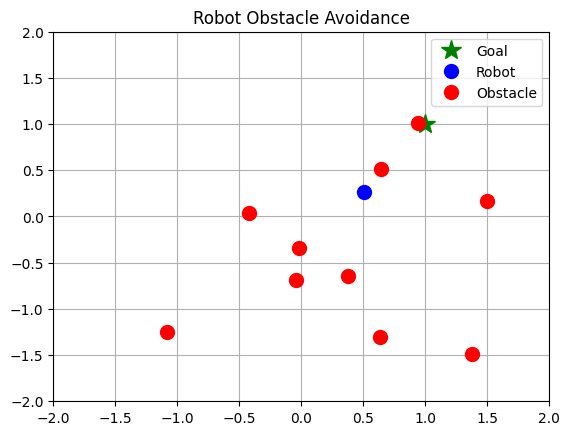

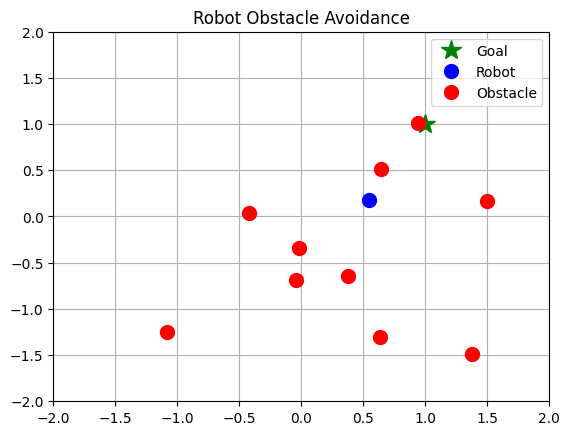

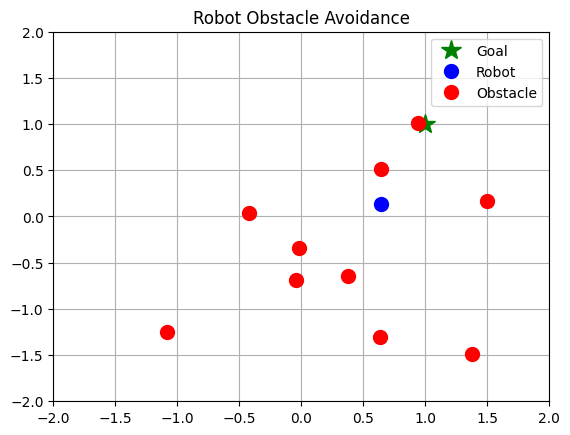

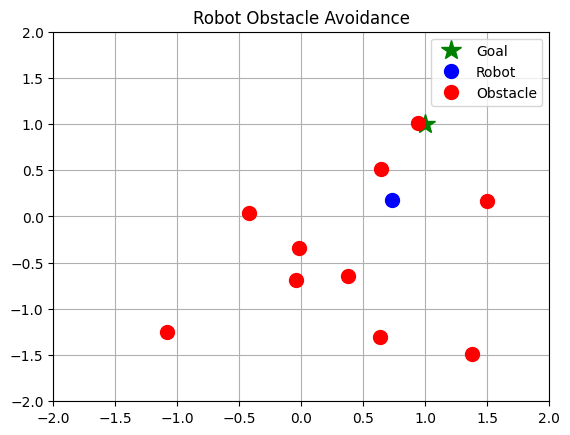

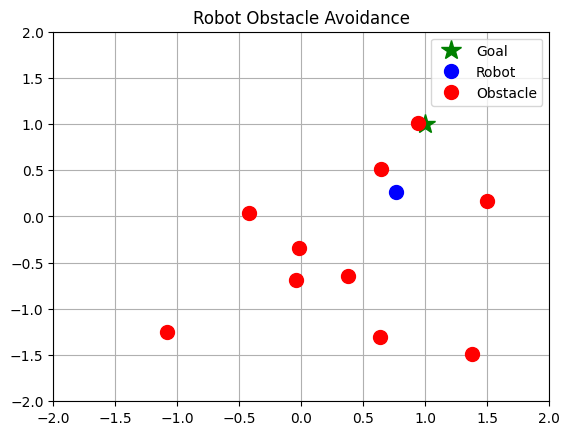

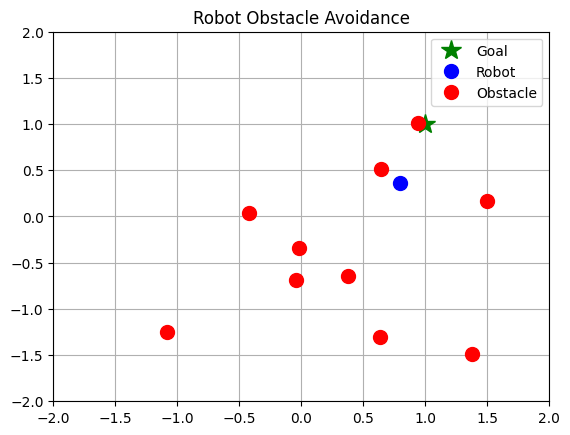

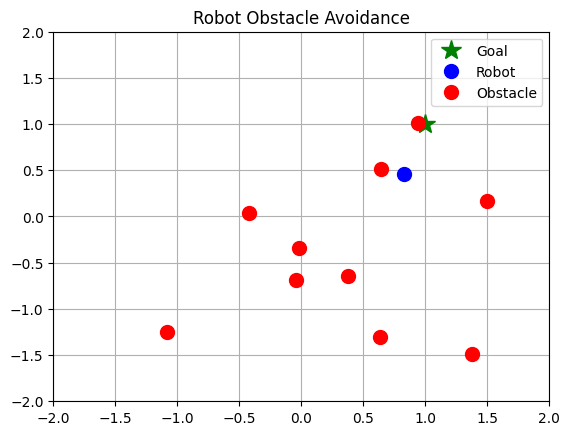

Obstacle Detected! Evading.


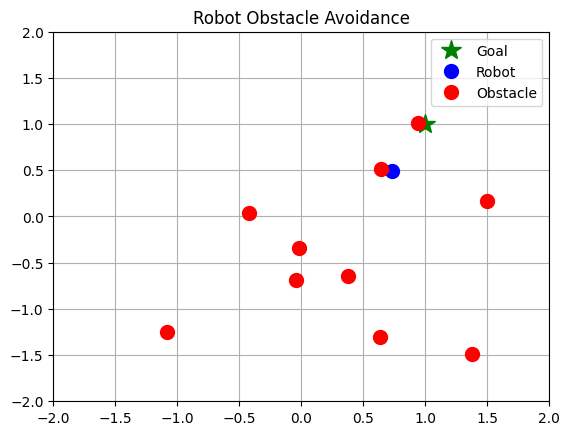

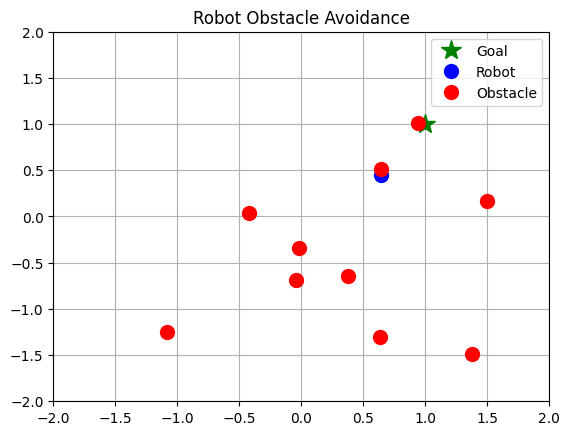

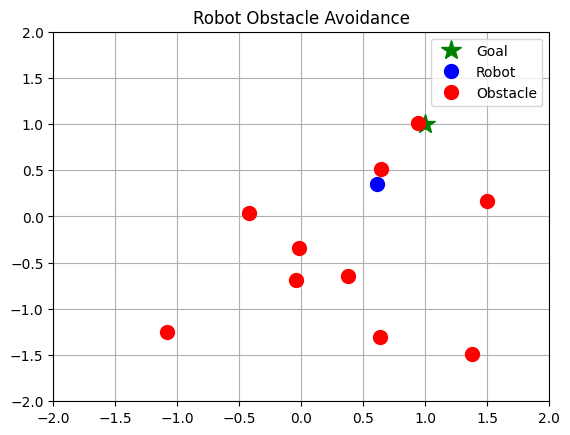

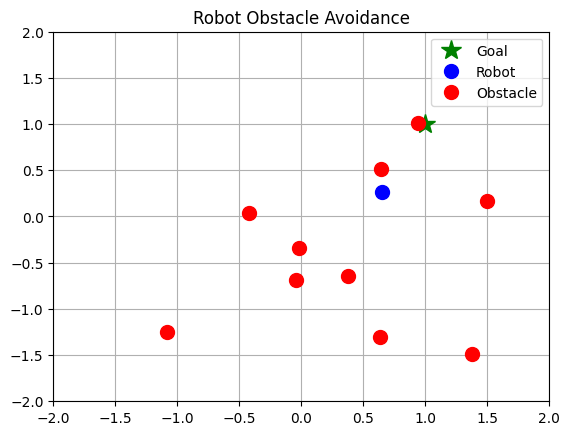

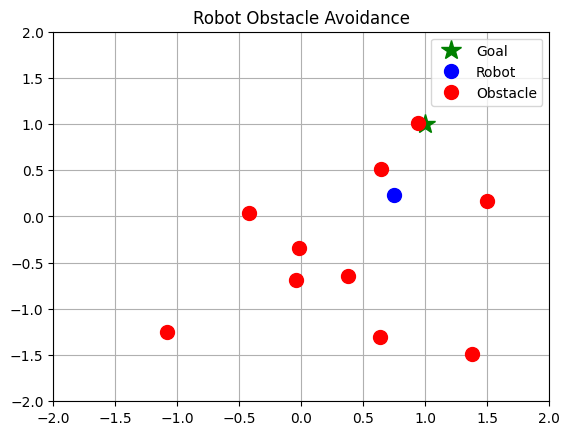

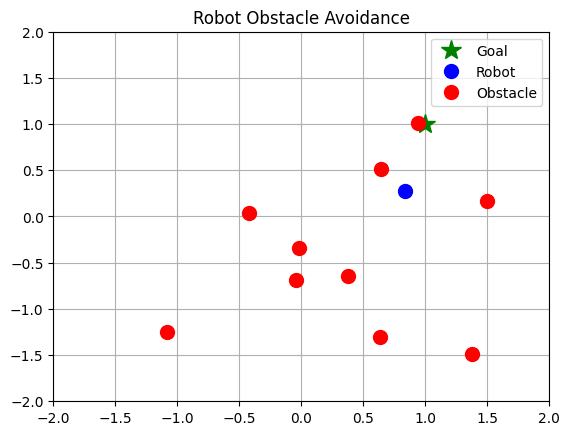

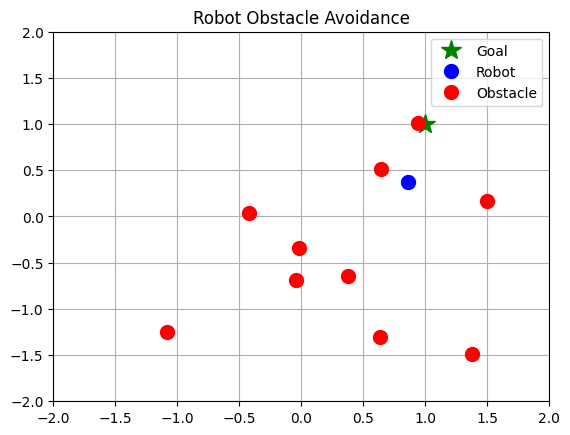

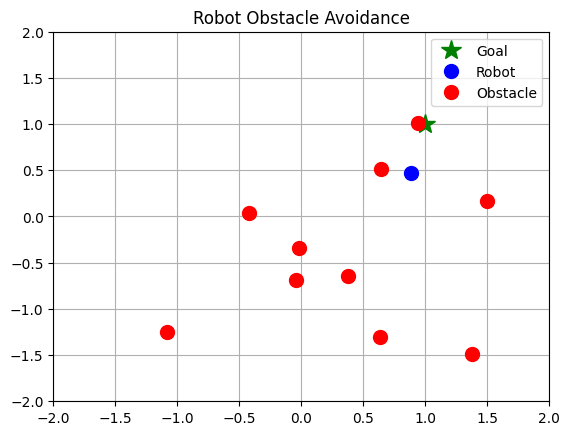

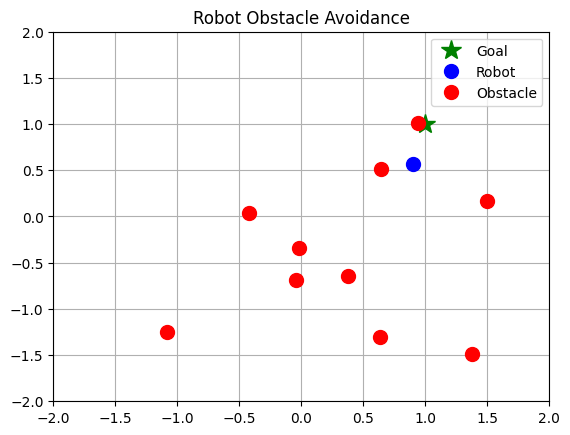

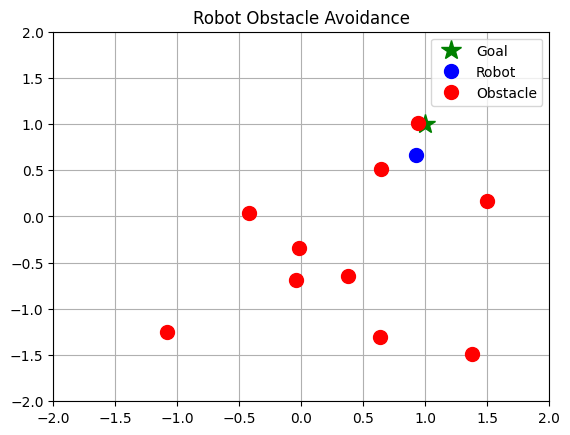

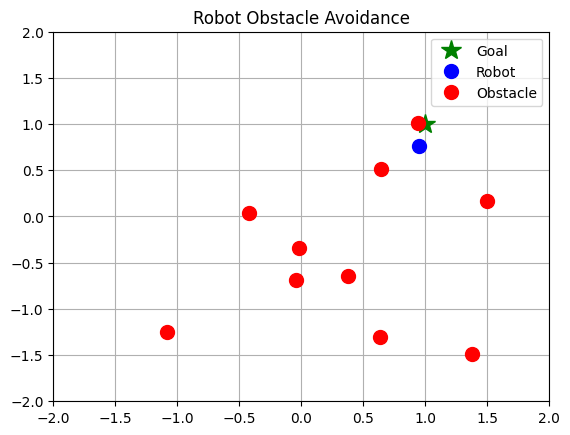

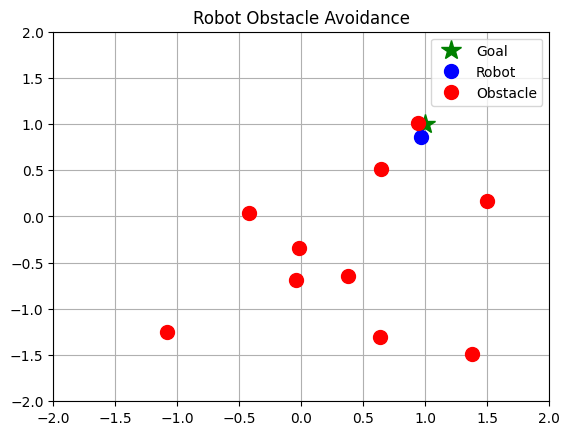

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the robot and environment
class Robot:
    def __init__(self, position, velocity=0.1):
        # FIX: Initialize position as a float array to allow for decimal positions
        self.position = np.array(position, dtype=float)
        self.velocity = velocity  # Robot velocity

    def move(self, direction):
        # Move the robot in a specific direction (angle in radians)
        self.position += self.velocity * np.array([np.cos(direction), np.sin(direction)])

# 2. Define the environment with obstacles
class ObstacleAvoidanceEnv:
    def __init__(self, robot, obstacles, goal):
        self.robot = robot
        self.obstacles = [np.array(o) for o in obstacles]  # Convert obstacles to numpy arrays
        self.goal = np.array(goal)  # Convert goal to a numpy array
        self.robot_radius = 0.2  # Increased radius for better detection

    def detect_obstacle(self):
        # Check if the robot is near any obstacle
        for obstacle in self.obstacles:
            if np.linalg.norm(self.robot.position - obstacle) < self.robot_radius:
                return True
        return False

    def is_goal_reached(self):
        # Check if the robot has reached the goal
        return np.linalg.norm(self.robot.position - self.goal) < self.robot_radius

    def move_robot(self, direction):
        # Move the robot
        self.robot.move(direction)

# 3. Define the obstacle avoidance control logic (IMPROVED)
def obstacle_avoidance(env):
    # Improved reactive control with a simple state
    direction = 0  # Initial direction
    avoidance_steps = 0  # Counter for how long to stay in avoidance mode

    while not env.is_goal_reached():
        # Always calculate the direct angle to the goal
        direction_to_goal = np.arctan2(env.goal[1] - env.robot.position[1], env.goal[0] - env.robot.position[0])

        if avoidance_steps > 0:
            # If in avoidance mode, continue with the evasive maneuver
            direction += np.pi / 4  # Keep turning
            avoidance_steps -= 1
        elif env.detect_obstacle():
            # Obstacle detected: enter avoidance mode
            print("Obstacle Detected! Evading.")
            avoidance_steps = 5  # Set to evade for 5 steps
            direction = direction_to_goal + np.pi / 2  # Make a sharp 90-degree turn
        else:
            # No obstacle and not in avoidance mode: head straight for the goal
            direction = direction_to_goal

        env.move_robot(direction)
        plot_robot_and_obstacles(env)

# 4. Plot the robot and obstacles (IMPROVED)
def plot_robot_and_obstacles(env):
    plt.clf()
    plt.plot(env.goal[0], env.goal[1], 'g*', markersize=15, label="Goal")
    plt.plot(env.robot.position[0], env.robot.position[1], 'bo', markersize=10, label="Robot")

    # FIX: Use a loop that only labels the first obstacle to avoid legend clutter
    for i, obstacle in enumerate(env.obstacles):
        plt.plot(obstacle[0], obstacle[1], 'ro', markersize=10, label="Obstacle" if i == 0 else "")

    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.legend()
    plt.grid(True)
    plt.title("Robot Obstacle Avoidance")
    plt.pause(0.05)

# 5. Initialize the robot, obstacles, and goal
robot = Robot(position=[-1, -1])
obstacles = np.random.uniform(-1.5, 1.5, size=(10, 2)) # random obstacles
goal = [1, 1]

# 6. Initialize the environment and run the obstacle avoidance system
env = ObstacleAvoidanceEnv(robot, obstacles, goal)
plt.figure()
obstacle_avoidance(env)
plt.show()